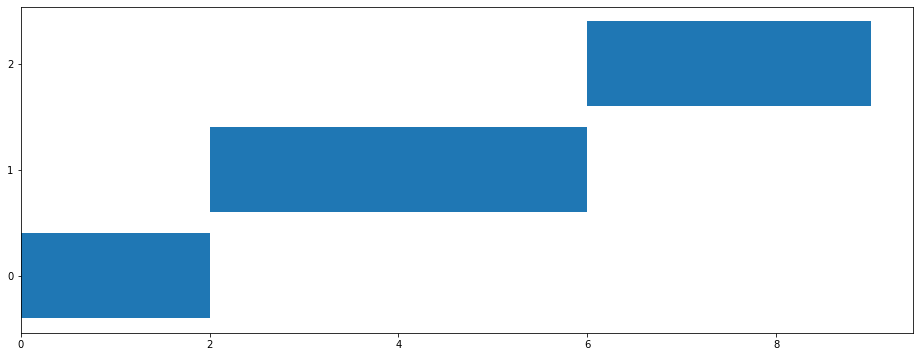

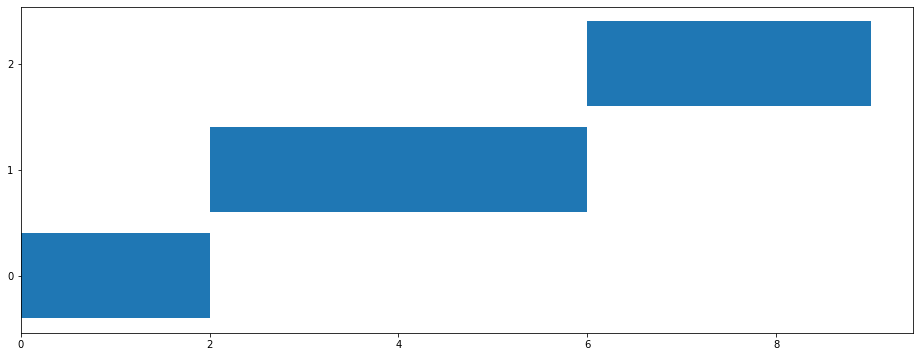

In [1]:
from tkinter import *
from tkinter import messagebox as ms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
root=Tk()
root.title("Shortest Job First And Shortest Run Time Next")
frame=Frame(bg='azure3',padx=7,pady=7)
gridcell=[[0]*6 for i in range(3)]
Label(frame,text="Id",bg='#8A2BE2',font=('arial',18,'bold'),padx=7).grid(row=0,column=0)
Label(frame,text="Arrival Time",bg='#FF7F50',font=('arial',18,'bold'),padx=7).grid(row=0,column=1)
Label(frame,text="Burst Time",bg='#BDB76B',font=('arial',18,'bold'),padx=7).grid(row=0,column=2)
p=[]
a=[];b=[];c=[];wt=[];tat=[];ft=[]
def new():
    a.append(Entry(frame,bg='azure4',font=('arial,16')))
    b.append(Entry(frame,bg='azure4',font=('arial,16')))
    c.append(Entry(frame,bg='azure4',font=('arial,16')))
    i=len(a)-1
    a[i].grid(row=i+1,column=0,padx=7,pady=7)
    b[i].grid(row=i+1,column=1,padx=7,pady=7)
    c[i].grid(row=i+1,column=2,padx=7,pady=7)

    
    
def sjf():
    n=len(a);
    imax=999999999999
    completed=0
    ind=-1
    current_time=0;
    Min=imax
    total_waiting_time=0.0
    total_turn_around_time=0.0
    p=[];q=[];Id=[]
    for i in range(n):
        Id.append(a[i].get())
        p.append(int(b[i].get()))
        q.append(int(c[i].get()))
        ft.append(0)
        wt.append(0)
        tat.append(0)    
    while(completed<n):
        for i in range(n):
            if(p[i]<=current_time):
                if(q[i]<Min and ft[i]==0):
                    ind=i
                    Min=q[i]
        if(ind>=0):
            completed+=1
            Min=imax
            current_time+=q[ind]
            ft[ind]=current_time
            tat[ind]=ft[ind]-p[ind]
            wt[ind]=tat[ind]-q[ind]
            total_waiting_time+=wt[ind]
            total_turn_around_time+=tat[ind]
            ind=-1
        else:
            current_time+=1
    avg_tat=total_turn_around_time/n
    avg_wt=total_waiting_time/n
    Label(frame,text="Finishing Time",bg='#f67c5f',font=('arial',18,'bold'),padx=7).grid(row=0,column=3)
    Label(frame,text="Turn Around Time",bg='#808000',font=('arial',18,'bold'),padx=7).grid(row=0,column=4)
    Label(frame,text="Waiting Time",bg='#edcc61',font=('arial',18,'bold'),padx=7).grid(row=0,column=5)
    for i in range(n):
        Label(frame,text=ft[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=3)
        Label(frame,text=tat[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=4)
        Label(frame,text=wt[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=5)
       
    Label(frame,text="Avg Turn Around Time",bg='#808000',font=('arial',14,'bold'),padx=7).grid(row=n+1,column=0)
    Label(frame,text=avg_tat ,bg='azure4',font=('arial,14')).grid(row=n+1,column=1)
    Label(frame,text="Avg Waiting Time",bg='#edcc61',font=('arial',14,'bold'),padx=7).grid(row=n+2,column=0)
    Label(frame,text=avg_wt ,bg='azure4',font=('arial,14')).grid(row=n+2,column=1)
    start=[];bet=[];xscal=[]
    for i in range(n):
        start.append(p[i]+wt[i])
    for i in range(n):
        bet.append(q[i])    
    win=Tk()    
    fig, ax = plt.subplots(1, figsize=(16,6))
    ax.barh(Id, bet, left=start)
    canvas=FigureCanvasTkAgg(fig,master = win)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,win)
    toolbar.update()
    canvas.get_tk_widget().pack()
    win.mainloop()
def srtn():
    at=[];st=[]
    n=len(a);
    total_waiting_time=0.0
    total_turn_around_time=0.0
    bt=[0]*n;Id=[]
    for i in range(n):
        Id.append(a[i].get())
        at.append(int(b[i].get()))
        st.append(int(c[i].get()))
        ft.append(0)
        wt.append(0)
        tat.append(0)
        bt[i] = [st[i], at[i], i]
    ll = []
    w=[]
    temp=[Id[0],0,0]
    w.append(temp)
    ind=0
    for i in range(0, sum(st)):
        l =[ j for j in bt  if j[1] <= i]
        l.sort(key=lambda x: x[0])
        if(Id[l[0][2]]==w[ind][0]):
            w[ind][2]+=1
        else:
            temp=[Id[l[0][2]],i,1]
            w.append(temp)
            ind+=1
        bt[bt.index(l[0])][0] -= 1
        for k in bt:
            if k[0] == 0:
                t = bt.pop(bt.index(k))
                ll.append([k, i + 1])
    for i in ll:
        ft[i[0][2]]=i[1]
    for i in range(n):
        tat[i] = ft[i] - at[i]
        wt[i] = tat[i] - st[i]
        total_waiting_time+=wt[i]
        total_turn_around_time+=tat[i]
    avg_tat=total_turn_around_time/(len(tat))
    avg_wt=total_waiting_time/(len(wt))
    Label(frame,text="Finishing Time",bg='#f67c5f',font=('arial',18,'bold'),padx=7).grid(row=0,column=3)
    Label(frame,text="Turn Around Time",bg='#808000',font=('arial',18,'bold'),padx=7).grid(row=0,column=4)
    Label(frame,text="Waiting Time",bg='#edcc61',font=('arial',18,'bold'),padx=7).grid(row=0,column=5)
    for i in range(n):
        Label(frame,text=ft[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=3)
        Label(frame,text=tat[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=4)
        Label(frame,text=wt[i] ,bg='azure4',font=('arial,16')).grid(row=i+1,column=5)       
    Label(frame,text="Avg Turn Around Time",bg='#808000',font=('arial',14,'bold'),padx=7).grid(row=n+1,column=0)
    Label(frame,text=avg_tat ,bg='azure4',font=('arial,14')).grid(row=n+1,column=1)
    Label(frame,text="Avg Waiting Time",bg='#edcc61',font=('arial',14,'bold'),padx=7).grid(row=n+2,column=0)
    Label(frame,text=avg_wt ,bg='azure4',font=('arial,14')).grid(row=n+2,column=1)
    bet=[];start=[];asd=[];xscal=[]
    for i in w:
        bet.append(i[2])
        start.append(i[1])
        asd.append(i[0])
    for i in range(sum(st)+1):
        xscal.append(i+1)
    win=Tk()
    fig, ax = plt.subplots(1, figsize=(16,6))
    ax.barh(asd, bet, left=start)
    canvas=FigureCanvasTkAgg(fig,master = win)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,win)
    toolbar.update()
    canvas.get_tk_widget().pack()
    win.mainloop()   
i=len(a)+1
frame.grid(columnspan=3)
Button(text="new",command=new).grid(row=i,column=0)
Button(text="sjf",command=sjf).grid(row=i,column=1)
Button(text="srtn",command=srtn).grid(row=i,column=2)
root.mainloop()